## Reference : 

[link text](https://towardsdatascience.com/how-to-calculate-customer-retention-rate-a-practical-approach-1c97709d495f)

# Important Terminologies : 

* **Churn Rate (or Attrition Rate) — the percentage of customers that abandon your product over a period of time.**
* **Retention Rate — the percentage of customers that continue using your product over a period of time.**
* **Cohort analysis:  A cohort analysis is probably the best tool to analyze Retention and Churn. `It’s a specific type of table that will split the users into “buckets” (cohorts), and each cohort will contain users that signed up on the same day/week/month/etc. That said, each cohort refers to one period of time (one day, in our example)`.**

# Introduction : 

* **This dataset is of a fiction gaming app where each row is related to a player’s activity in one day.**

### Data Dictionary : 

* **`username:` unique user id.**
* **`signup_date:` the date the player signed up.**
* **`ref_date:` the date of the activity.**
* **`money:` how much did the player spend on that ref_date.**
* **`time:` how many minutes the user played on that ref_date.**
* **`country:` categories like this allow you to segment players and calculate retention per country, for instance.**

### Problem Statement : 

 *    **The main idea here is to measure if our users are coming back**

### Plan of action : 

* We will look at the data gathered from our app and apply some small changes to transform it into the right format.
* With this, we can then have a **`simple pivot table with the number of users who were active each day.`**
* After that, we can also **`build the retention rate table, which is a variation of the first pivot table.`**
* And finally, **`we build the heatmaps for the two tables and try to come up with any conclusions.`** 

# 1.0 Importing Libraries and Datasets : 

In [0]:
# For displaying multiple outputs :

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [5]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Algorithms/Customer Retention Rate/raw.csv')
df.head()
df.shape

,username,signup_date,ref_date,money,time,country
0,U10000,01/10/2019,01/10/2019,2,89,Canada
1,U10000,01/10/2019,07/10/2019,0,35,Canada
2,U10000,01/10/2019,09/10/2019,2,4,Canada
3,U10000,01/10/2019,10/10/2019,1,5,Canada
4,U10000,01/10/2019,12/10/2019,1,17,Canada


(822, 6)

# 2.0 Cohort Analysis : 

### 2.1 Date_time Formatting : 

In [0]:
df.dtypes

username       object
signup_date    object
ref_date       object
money           int64
time            int64
country        object
dtype: object

In [0]:
df['signup_date'] = pd.to_datetime(df['signup_date'], format = ('%d/%m/%Y'))
df['ref_date'] = pd.to_datetime(df['ref_date'], format = ('%d/%m/%Y'))
df.dtypes

username               object
signup_date    datetime64[ns]
ref_date       datetime64[ns]
money                   int64
time                    int64
country                object
dtype: object

### 2.2 Creating a new column called 'seniority`

* `Shows the age of the users from the first signup.`

In [0]:
df['seniority'] = (df['ref_date'] - df['signup_date']).dt.days + 1
df.head()

,username,signup_date,ref_date,money,time,country,seniority
0,U10000,2019-10-01,2019-10-01,2,89,Canada,1
1,U10000,2019-10-01,2019-10-07,0,35,Canada,7
2,U10000,2019-10-01,2019-10-09,2,4,Canada,9
3,U10000,2019-10-01,2019-10-10,1,5,Canada,10
4,U10000,2019-10-01,2019-10-12,1,17,Canada,12


### 2.3 Creating Cohorts : 

* **Think of cohorts like `buckets where groups of customers are placed according to a certain criteria.`**
* **With that, we can compare several metrics regarding the lifecycle of the product and its users. The important message here is `“tracking their lifecycle”.`**

* Our cohorts will be created from the signup dates (one for each date). That way they are mutually exclusive. We start by using the groupby method with signup_date and seniority, and getting their size. We also need to reset the index.

In [0]:
# Groupby signup_date and seniority :
group = df.groupby(['signup_date', 'seniority'])

# Getting size of the groupby object : 
cohort_data = group['username'].size()

# Resetting the index : 
cohort_data = cohort_data.reset_index()
cohort_data

# The df belows shows the users count for each seniority.

,signup_date,seniority,username
0,2019-10-01,1,9
1,2019-10-01,2,6
2,2019-10-01,3,5
3,2019-10-01,4,7
4,2019-10-01,5,6
...,...,...,...
115,2019-10-13,2,9
116,2019-10-13,3,12
117,2019-10-14,1,11
118,2019-10-14,2,7


* **The dataframe above shows us the `users count for each seniority.`**

### 2.4 Creating the Pivot table : 

* **It should have the `signup_date in the index` and `seniority as columns`. The `values will be obtained from the username column`, which after the previous step now contains the count of users for the cohorts.**

* **Logic of code below :**

* `The snippet below shows how to isolate the number of signups from each cohort, at the start of their lifecycle (seniority = 1). I used a variable aptly named base, and that is what I used to calculate the retention rate, dividing the whole cohort_counts matrix by the base.`


In [0]:
cohort_counts = cohort_data.pivot(index='signup_date', columns='seniority', values='username')

# this is for percentage
# We need the base for our retention rate calculation
# Here we just take the first column of cohort_counts
base = cohort_counts[1]

# And now we apply the divide method to our cohort_counts, dividing it by the base
retention = cohort_counts.divide(base, axis=0).round(3)   

In [0]:
# this is the 
cohort_counts

seniority,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
signup_date,,,,,,,,,,,,,,,
2019-10-01,9.0,6.0,5.0,7.0,6.0,2.0,2.0,3.0,3.0,5.0,2.0,2.0,4.0,2.0,3.0
2019-10-02,11.0,7.0,8.0,11.0,7.0,8.0,5.0,5.0,7.0,2.0,3.0,4.0,7.0,3.0,NaN
2019-10-03,11.0,9.0,9.0,6.0,10.0,4.0,6.0,4.0,4.0,3.0,3.0,2.0,2.0,NaN,NaN
2019-10-04,15.0,11.0,9.0,12.0,12.0,8.0,8.0,6.0,5.0,3.0,6.0,2.0,NaN,NaN,NaN
2019-10-05,12.0,9.0,11.0,8.0,11.0,9.0,4.0,6.0,5.0,8.0,3.0,NaN,NaN,NaN,NaN
2019-10-06,9.0,7.0,8.0,7.0,5.0,5.0,5.0,1.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN
2019-10-07,9.0,8.0,7.0,4.0,6.0,6.0,5.0,6.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-08,14.0,11.0,11.0,10.0,9.0,8.0,6.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-09,11.0,8.0,9.0,9.0,4.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
retention

seniority,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
signup_date,,,,,,,,,,,,,,,
2019-10-01,1.0,0.667,0.556,0.778,0.667,0.222,0.222,0.333,0.333,0.556,0.222,0.222,0.444,0.222,0.333
2019-10-02,1.0,0.636,0.727,1.000,0.636,0.727,0.455,0.455,0.636,0.182,0.273,0.364,0.636,0.273,NaN
2019-10-03,1.0,0.818,0.818,0.545,0.909,0.364,0.545,0.364,0.364,0.273,0.273,0.182,0.182,NaN,NaN
2019-10-04,1.0,0.733,0.600,0.800,0.800,0.533,0.533,0.400,0.333,0.200,0.400,0.133,NaN,NaN,NaN
2019-10-05,1.0,0.750,0.917,0.667,0.917,0.750,0.333,0.500,0.417,0.667,0.250,NaN,NaN,NaN,NaN
2019-10-06,1.0,0.778,0.889,0.778,0.556,0.556,0.556,0.111,0.333,0.333,NaN,NaN,NaN,NaN,NaN
2019-10-07,1.0,0.889,0.778,0.444,0.667,0.667,0.556,0.667,0.444,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-08,1.0,0.786,0.786,0.714,0.643,0.571,0.429,0.429,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-09,1.0,0.727,0.818,0.818,0.364,0.636,0.545,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* **This percentage in the cell above is the number of active users from the same cohort in a day, divided by the number of users the cohort started with on day 1.** 


* **If 10 people signed up on day N, and only 4 were still around after 7 days, the retention rate for that cohort after 7 days is 40% (4/10).**

* **The churn rate is the exact opposite. If we kept 40% of our users, it means that 60% of them have churned.**
* **`Churn Rate is exact opposite of Retention Rate`**

### 2.5 Heatmaps to visualize Cohorts : 

#### 2.6 Active users Table : 

* **There are two main approaches to how you can extract some useful insights from this heatmap. `The most obvious way is to look at how a specific cohort behaves as they get “older”.` Let’s call it a horizontal approach. In a typical heatmap, you will see the number of users dropping from left to right. Unless you have an outstanding product where every user keeps coming back every day/month/etc!**

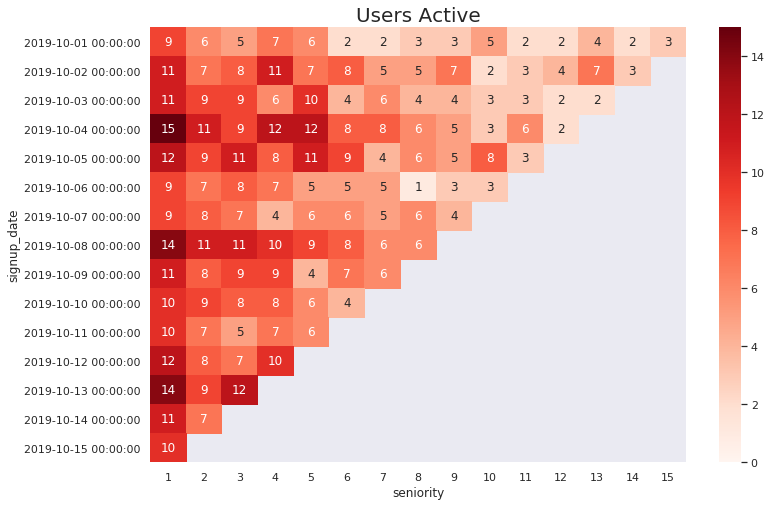

In [0]:
# User Count heatmap
plt.figure(figsize=(12,8))
plt.title('Users Active',fontsize = 20)
ax = sns.heatmap(data=cohort_counts, annot=True, vmin=0.0,cmap='Reds')
ax.set_yticklabels(cohort_counts.index)
fig=ax.get_figure();
# fig.savefig("Retention Counts.png");

* **Observation : `In the 3rd row ,on the 6th column`, 4 users of all the 11 that signed up on the 3rd of October, were active on their sixth day.**

#### 2.7 Retention Table : 

* **The approach below to evaluate how our product is behaving in terms of retaining users at specific seniority stages. Let’s call this one a vertical approach. It’s easier to understand using the retention table instead of the user count, because typically the cohorts may not have the same base to compare them vertically — whereas the rate is a percentage. Have a look at the heatmap and check out the example after.**

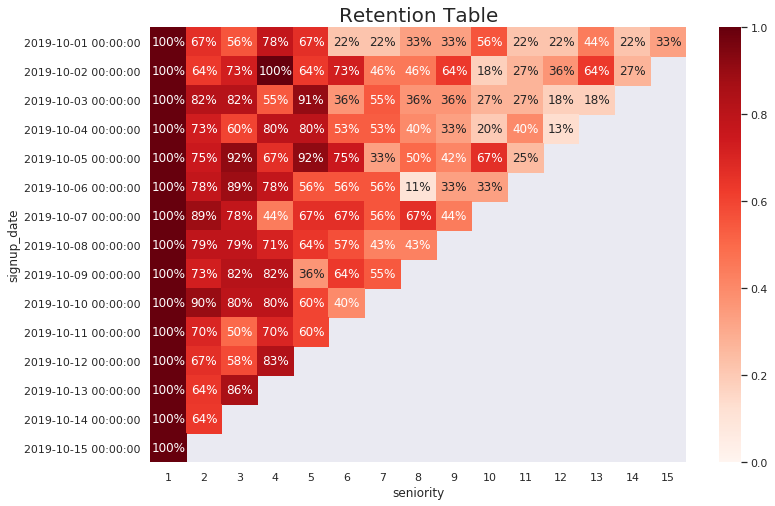

In [0]:
plt.figure(figsize=(12,8))
plt.title('Retention Table',fontsize = 20)
ax = sns.heatmap(data=retention, annot=True, fmt='.0%', vmin=0.0, vmax=1,cmap='Reds')
ax.set_yticklabels(retention.index)
fig=ax.get_figure()
# fig.savefig("Retention_Rate.png")
plt.show();

* **As an example, imagine we updated our app to push a notification when users reach their 8th day. We would expect that some users would log in on the 8th day, maybe we can even offer them something as an incentive for them to be engaged again. We would then expect some sort of spike around the 8th day for the users that got the update. Looking at the seniority column equal to 8, we can then see how the retention changed from cohort to cohort.**

# 3.0 Checking the retention country wise : 

In [0]:
usa = df[df.country=='United States']
usa.head()
usa.shape

,username,signup_date,ref_date,money,time,country,seniority
12,U10002,2019-10-01,2019-10-01,0,110,United States,1
13,U10002,2019-10-01,2019-10-04,1,51,United States,4
14,U10002,2019-10-01,2019-10-11,1,81,United States,11
15,U10002,2019-10-01,2019-10-12,0,21,United States,12
16,U10003,2019-10-01,2019-10-01,2,112,United States,1


(184, 7)

In [0]:
grouping = usa.groupby(['signup_date', 'seniority'])
# cohort_data = grouping['username'].apply(pd.Series.nunique)
cohort_data = grouping['username'].size()
cohort_data = cohort_data.reset_index()
cohort_counts = cohort_data.pivot(index='signup_date', columns='seniority', values='username')
retention = cohort_counts.divide(cohort_counts[1], axis=0).round(3)
retention

seniority,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
signup_date,,,,,,,,,,,,,,,
2019-10-01,1.0,0.667,0.667,1.000,0.667,0.333,NaN,0.333,NaN,0.333,0.333,0.333,0.333,0.333,0.333
2019-10-02,1.0,0.500,1.000,1.000,1.000,0.500,NaN,NaN,1.0,NaN,NaN,NaN,0.500,0.500,NaN
2019-10-03,1.0,1.000,0.500,0.500,1.000,0.500,NaN,NaN,NaN,0.500,NaN,NaN,0.500,NaN,NaN
2019-10-04,1.0,NaN,NaN,1.000,1.000,NaN,1.0,1.000,NaN,NaN,1.000,NaN,NaN,NaN,NaN
2019-10-05,1.0,0.500,1.000,1.000,1.000,1.000,NaN,0.500,0.5,0.500,0.500,NaN,NaN,NaN,NaN
2019-10-06,1.0,1.000,1.000,0.667,0.333,0.333,1.0,0.333,NaN,0.667,NaN,NaN,NaN,NaN,NaN
2019-10-07,1.0,1.000,1.000,1.000,NaN,1.000,NaN,1.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-08,1.0,0.800,0.800,0.800,0.600,0.200,0.2,0.600,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-09,1.0,1.000,1.000,1.000,1.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


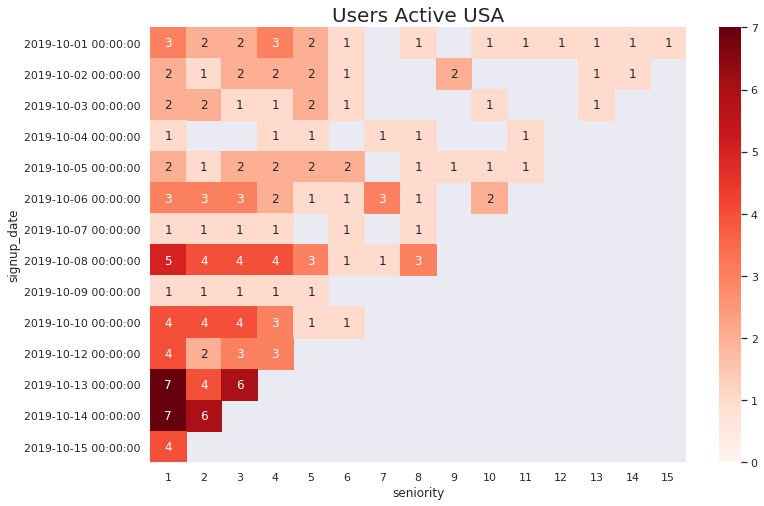

In [0]:
# User Count heatmap
plt.figure(figsize=(12,8))
plt.title('Users Active USA',fontsize = 20)
ax = sns.heatmap(data=cohort_counts, annot=True, vmin=0.0,cmap='Reds')
ax.set_yticklabels(cohort_counts.index)
fig=ax.get_figure();
# fig.savefig("Retention Counts.png");

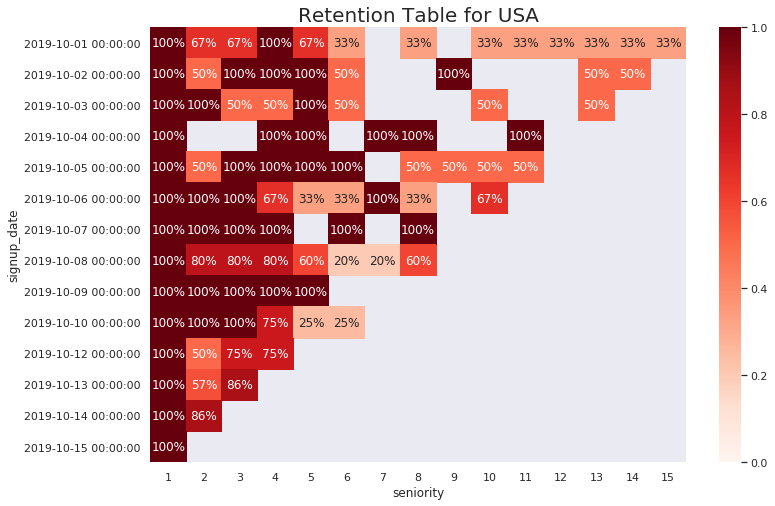

In [0]:
plt.figure(figsize=(12,8))
plt.title('Retention Table for USA', fontsize = 20)
ax = sns.heatmap(data=retention, annot=True, fmt='.0%', vmin=0.0, vmax=1,cmap='Reds')
ax.set_yticklabels(retention.index)
fig=ax.get_figure()
# fig.savefig("Retention_Rate.png")
plt.show();

# 4.0 Checking how much money each cohort spends :  

In [0]:
# df.head()

In [0]:
grouping = df.groupby(['money', 'seniority'])
# cohort_data = grouping['username'].apply(pd.Series.nunique)
cohort_data = grouping['username'].size()
cohort_data = cohort_data.reset_index()
cohort_counts = cohort_data.pivot(index='money', columns='seniority', values='username')
retention = cohort_counts.divide(cohort_counts[1], axis=0).round(3)
# retention

In [0]:
cohort_counts.head()

seniority,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
money,,,,,,,,,,,,,,,
0,47.0,34.0,39.0,34.0,33.0,24.0,20.0,15.0,12.0,13.0,10.0,4.0,8.0,1.0,2.0
1,76.0,44.0,41.0,36.0,28.0,25.0,16.0,13.0,13.0,7.0,6.0,5.0,4.0,3.0,1.0
2,36.0,34.0,26.0,26.0,18.0,7.0,9.0,7.0,5.0,3.0,1.0,NaN,NaN,NaN,NaN
3,9.0,4.0,3.0,3.0,3.0,5.0,2.0,2.0,1.0,1.0,NaN,1.0,1.0,1.0,NaN


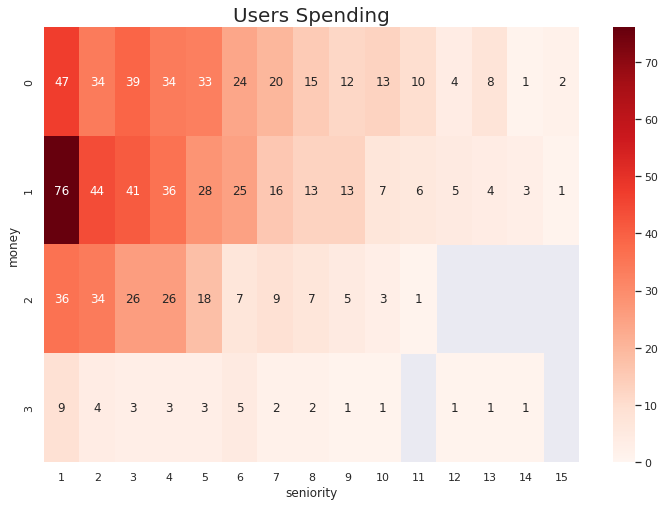

In [0]:
# User Count heatmap
plt.figure(figsize=(12,8))
plt.title('Users Spending',fontsize = 20)
ax = sns.heatmap(data=cohort_counts, annot=True, vmin=0.0,cmap='Reds')
ax.set_yticklabels(cohort_counts.index)
fig=ax.get_figure();
# fig.savefig("Retention Counts.png");

Observation : 

* For the first day ofsign up, 76 users have spend an amount of 1 in the app followed by 2 which was spent by around 36 users. 
* After a week of sign in, we can see a mojor decrease in the amount spent.

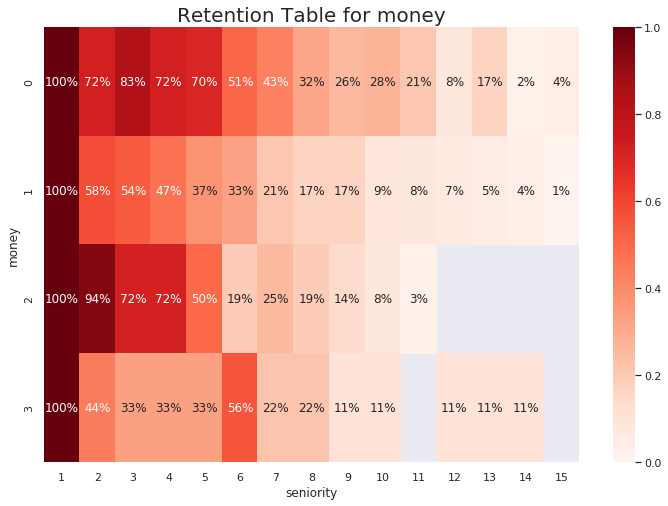

In [0]:
plt.figure(figsize=(12,8))
plt.title('Retention Table for money', fontsize = 20)
ax = sns.heatmap(data=retention, annot=True, fmt='.0%', vmin=0.0, vmax=1,cmap='Reds')
ax.set_yticklabels(retention.index)
fig=ax.get_figure()
# fig.savefig("Retention_Rate.png")
plt.show();

# 4.1 Checking the amount of time spent by the users.

In [0]:
df.head(2)

,username,signup_date,ref_date,money,time,country,seniority
0,U10000,2019-10-01,2019-10-01,2,89,Canada,1
1,U10000,2019-10-01,2019-10-07,0,35,Canada,7


In [0]:
grouping = df.groupby(['time', 'seniority'])
# cohort_data = grouping['username'].apply(pd.Series.nunique)
cohort_data = grouping['username'].size()
cohort_data = cohort_data.reset_index()
cohort_counts = cohort_data.pivot(index='time', columns='seniority', values='username')
retention = cohort_counts.divide(cohort_counts[1], axis=0).round(3)
# retention

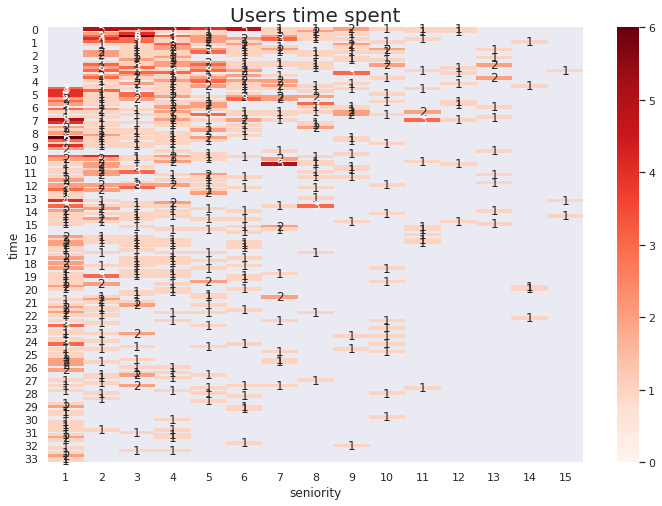

In [0]:
# User Count heatmap
plt.figure(figsize=(12,8))
plt.title('Users time spent',fontsize = 20)
ax = sns.heatmap(data=cohort_counts, annot=True, vmin=0.0,cmap='Reds')
ax.set_yticklabels(cohort_counts.index)
fig=ax.get_figure();
# fig.savefig("Retention Counts.png");

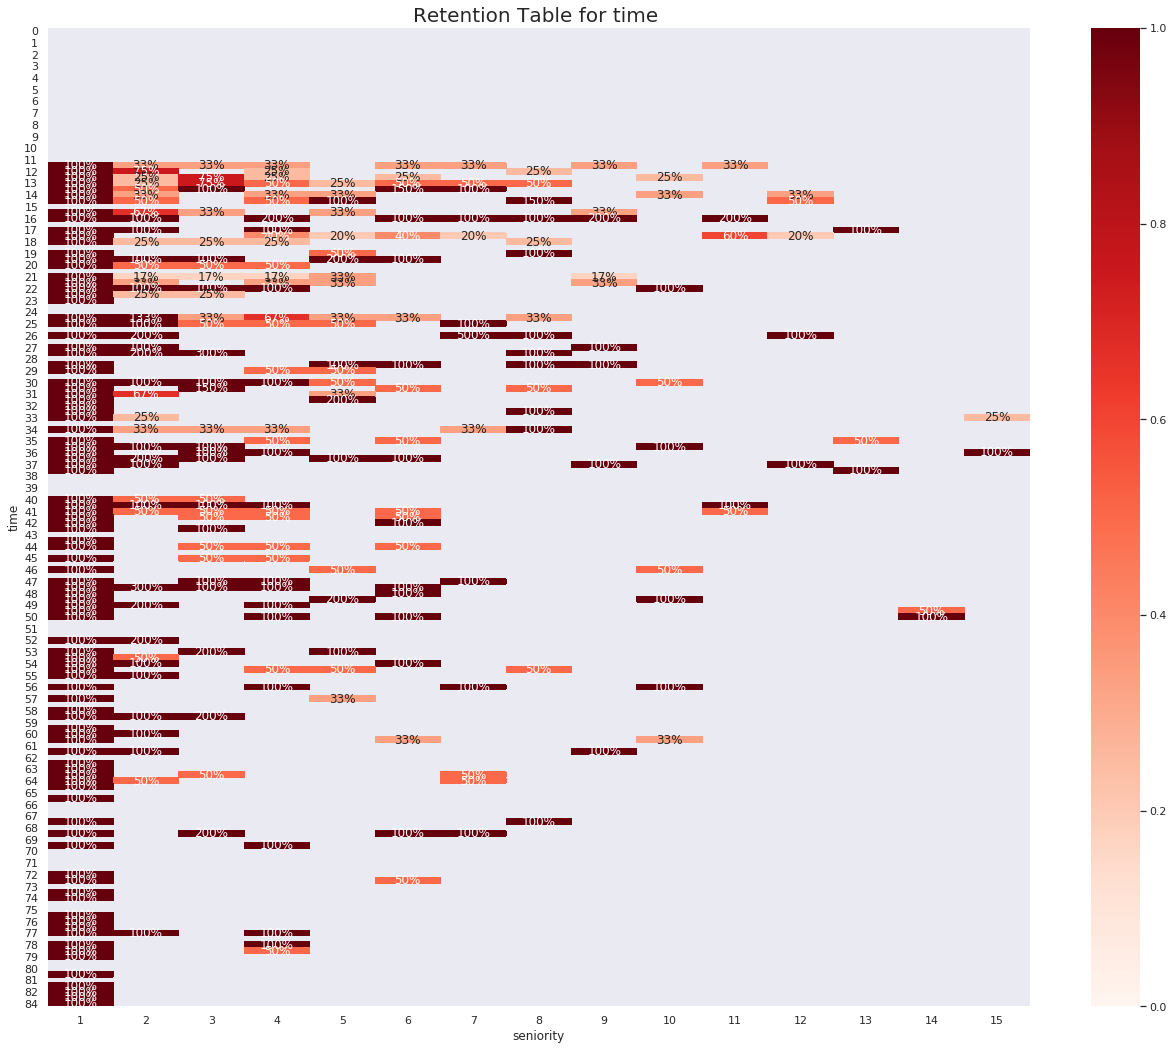

In [0]:
plt.figure(figsize=(22,18))
plt.title('Retention Table for time ', fontsize = 20)
ax = sns.heatmap(data=retention, annot=True, fmt='.0%', vmin=0.0, vmax=1,cmap='Reds')
ax.set_yticklabels(retention.index)
fig=ax.get_figure()
# fig.savefig("Retention_Rate.png")
plt.show();